In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

## Load Dataset

In [2]:
df = pd.read_parquet('/Users/minkhant/Documents/Projects/Natural Language Processing/data/preprocessed/full_dataset.parquet')

In [3]:
X = sparse.load_npz("/Users/minkhant/Documents/Projects/Natural Language Processing/data/preprocessed/tfidf_matrix.npz")

In [4]:
X.toarray()[1:10,100:200]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02358229, 0.        , 0.02518528,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [5]:
X.shape

(12284, 5000)

In [6]:
X.dtype

dtype('float64')

In [7]:
y = df['target']

In [8]:
y.shape

(12284,)

## Split Train, Test, Validation dataset

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [10]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((9827, 5000), (1228, 5000), (1229, 5000), (9827,), (1228,), (1229,))

In [11]:
y_train.value_counts()

target
1    4914
0    4913
Name: count, dtype: int64

## Naives Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
nb_model = MultinomialNB()

In [14]:
nb_model.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [15]:
y_pred = nb_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
accuracy_score(y_test, y_pred)

0.9617575264442636

In [18]:
confusion_matrix(y_test, y_pred)

array([[578,  37],
       [ 10, 604]])

In [19]:
import joblib

In [20]:
joblib.dump(nb_model, "/Users/minkhant/Documents/Projects/Natural Language Processing/models/naive_bayes_model.pkl")

['/Users/minkhant/Documents/Projects/Natural Language Processing/models/naive_bayes_model.pkl']

## Support Vector Machine

In [21]:
from sklearn.svm import LinearSVC

In [22]:
svm_model = LinearSVC()

In [23]:
svm_model.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [24]:
svm_y_pred = svm_model.predict(X_test)

In [25]:
print(accuracy_score(y_test, svm_y_pred))
print(confusion_matrix(y_test, svm_y_pred))

0.9894222945484134
[[610   5]
 [  8 606]]


In [26]:
joblib.dump(svm_model, '/Users/minkhant/Documents/Projects/Natural Language Processing/models/svm_model.pkl')

['/Users/minkhant/Documents/Projects/Natural Language Processing/models/svm_model.pkl']

## Evaluation of MNB and SVM

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, y_pred, model_name = "Model"):
    """
        This function output the model metrics: accuracy, precision, recall and f1 score. Plot the confusion matix
    """
    
    # metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Output
    print(f"Results for {model_name}")
    print("-------------------------")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    # plt.show()
    

Results for Naive Bayes
-------------------------
Accuracy : 0.9618
Precision : 0.9423
Recall : 0.9837
F1 Score : 0.9625


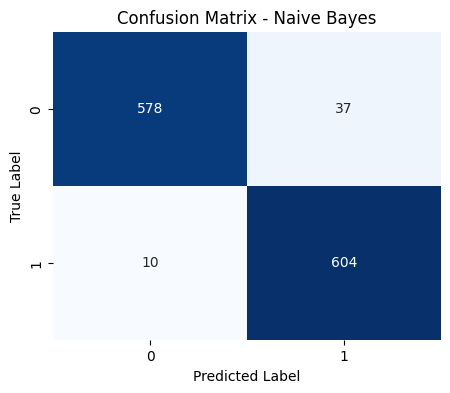

In [28]:
evaluate_model(nb_model, y_pred, model_name='Naive Bayes')
plt.savefig('/Users/minkhant/Documents/Projects/Natural Language Processing/image/Naive_Bayes_CM')

Results for Support Vector Machine
-------------------------
Accuracy : 0.9894
Precision : 0.9918
Recall : 0.9870
F1 Score : 0.9894


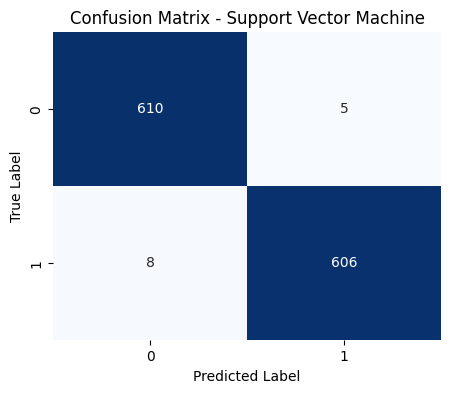

In [29]:
evaluate_model(svm_model, svm_y_pred, model_name='Support Vector Machine')
plt.savefig("/Users/minkhant/Documents/Projects/Natural Language Processing/image/SVM_CM.png")

In [30]:
# validation accuracy
y_pred_val_nb = nb_model.predict(X_val)
y_pred_val_svm = svm_model.predict(X_val)

print(f"MNB Validatoin Accuracy: ", accuracy_score(y_val, y_pred_val_nb))
print(f"SVM Validatoin Accuracy: ", accuracy_score(y_val, y_pred_val_svm))

MNB Validatoin Accuracy:  0.9682410423452769
SVM Validatoin Accuracy:  0.992671009771987


In [31]:

sample = pd.read_csv('/Users/minkhant/Documents/Projects/Natural Language Processing/data/raw/sample_spam_ham.csv')
new_mail_test = sample['text'].tolist()

vectorizer = joblib.load("/Users/minkhant/Documents/Projects/Natural Language Processing/models/tfidf_vectorizer.pkl")
new_mail_test_v = vectorizer.transform(new_mail_test)

print("Naive Bayes :", nb_model.predict(new_mail_test_v))
print("SVM :", svm_model.predict(new_mail_test_v))

Naive Bayes : [0 0 0 0 1 1 1 1 1 1]
SVM : [0 0 0 0 0 1 0 1 0 1]


In [32]:
new_mail_test

['Hey, are we still meeting for lunch today?',
 "I'll call you after the meeting finishes.",
 'Can you send me the report by tonight?',
 "Let's catch up this weekend at the park.",
 "Don't forget to bring your notebook tomorrow.",
 "Congratulations! You've won a free iPhone. Click here.",
 'Get cheap loans approved instantly. Apply now!',
 'Exclusive deal just for you. Claim your prize today.',
 'You have been selected for a cash reward. Visit link.',
 'URGENT! Verify your account to avoid suspension.']

In [33]:
vectorizer.get_feature_names_out()

array(['0f', '0n', '0ur', ..., 'zip', 'zip code', 'zip codes'],
      dtype=object)

In [34]:
new_data = ["Hey, are we still meeting for lunch today?", "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize."]
print(nb_model.predict(vectorizer.transform(new_data)))

[0 1]


In [35]:
new_data = ["Hey, are we still meeting for lunch today?", "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize."]
print(svm_model.predict(vectorizer.transform(new_data)))

[0 1]
